In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cropping Function

In [29]:
def largest_not_white_section(not_white_indices, apart_idxs):
  temp_list = [] # will be a list of the list of indices
  i=0
  for idx in apart_idxs:
    temp_list.append(not_white_indices[i:idx])
    i = idx

  temp_list.append(not_white_indices[i:])
  lengths_of_not_white_sections = [len(arr) if type(arr)==list else 1 for arr in temp_list]
  # crop the list of non-white columns/rows to the largest non-white section
  not_white_indices = temp_list[np.argmax(lengths_of_not_white_sections)]

  return not_white_indices
 

def crop_whitespace(img_path):

  # read in the image as a numpy array of shape [W x H x 3 (RGB)]
  img = plt.imread(img_path)

  # column-wise sum of the image (shape: [W,])
  img_vert_sum = np.sum( np.sum(img, axis=2), axis=1 ) 

  # row-wise sum of the image (shape: [H,])
  img_horz_sum = np.sum( np.sum(img, axis=2), axis=0 ) 

  # indices of image rows that are not 100% white (i.e. all RGB values = 255)
  not_white_rows = [i for i, notAllWhite in enumerate(img_vert_sum < 255.*3*img.shape[1]) if notAllWhite==True] 

  # indices of image columns that are not 100% white
  not_white_cols = [i for i, notAllWhite in enumerate(img_horz_sum < 255.*3*img.shape[0]) if notAllWhite==True]

  ''' ----- IMPORTANT NOTE -----
  The important content of the Xray images is a SINGLE object (i.e. a baggage), 
  not multiple objects dispersed around the image with blank spaces between them.
  So if two consecutive not-100%-white columns or rows are more than n pixels apart
  (meaning that there are two different objects with more than 200-pixel whitespace between them), 
  one of them must be a trivial defect in the background (e.g. pixel value of 250 instead of 255). 
  I used n=200 because most Xray images are around 1000 by 1000 pixels.
  If the images are smaller, using a smaller n is recommended. '''
  n = 200

  # indices of not-100%-white rows that are more than n pixels apart from the previous not-100%-white row
  apart_rows = [i for i in range(1, len(not_white_rows)) if not_white_rows[i] - not_white_rows[i-1] >= n]

  # indices of not-100%-white columns that are more than n pixels apart from the previous not-100%-white column
  apart_cols = [i for i in range(1, len(not_white_cols)) if not_white_cols[i] - not_white_cols[i-1] >= n]

  # if apart_rows is not empty, crop the list of non-white rows to only include the largest non-white section
  if apart_rows:   
    not_white_rows = largest_not_white_section(not_white_rows, apart_rows)

  # if apart_cols is not empty, crop the list of non-white columns to only include the largest non-white section
  if apart_cols:   
    not_white_cols = largest_not_white_section(not_white_cols, apart_cols)

  # get the width and height indices to crop the image
  new_w1, new_w2, new_h1, new_h2 = not_white_rows[0], not_white_rows[-1], not_white_cols[0], not_white_cols[-1]

  return img[new_w1:new_w2+1, new_h1:new_h2+1, :]

# Check if the function works for a single image

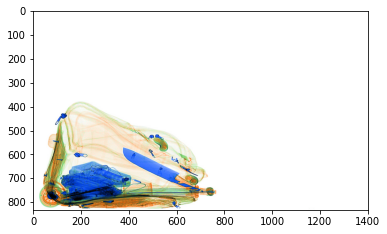

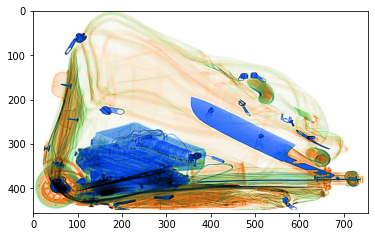

In [30]:
plt.imshow(plt.imread("sample.jpg"))
plt.show()
plt.imshow(crop_whitespace("sample.jpg"))
plt.show()

# Perform cropping for all images

In [ ]:
root_path = # insert your original folder # 
out_path = # insert your output folder # 
for cls in os.listdir(root_path):
  for img in os.listdir(os.path.join(root_path, cls)):
    img_crppped = crop_whitespace(os.path.join(root_path, cls, img))
    plt.imsave("/".join([out_path, cls, img]), img_crppped)